In [36]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('E:\\intellipat\\ml\\Decision tree\\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.shape

(303, 14)

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
data.loc[data.chol>300].shape

(43, 14)

In [10]:
data.loc[(data.chol>300)& (data.age>40)].shape

(42, 14)

<AxesSubplot:>

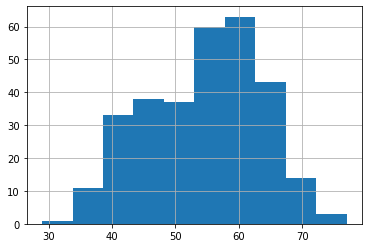

In [11]:
data['age'].hist(grid=True,bins=10)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

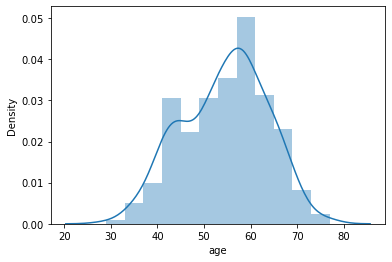

In [12]:
sns.distplot(data['age'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

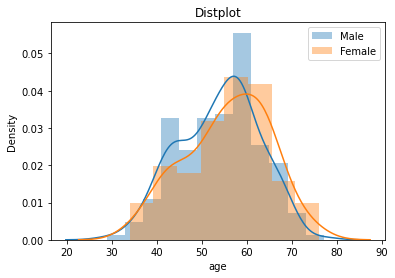

In [13]:
sns.distplot(data[data['sex']==1]['age'],label='Male')
sns.distplot(data[data['sex']==0]['age'],label='Female')
plt.legend()
plt.title('Distplot')

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

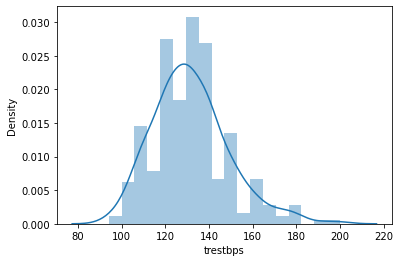

In [15]:
sns.distplot(data.trestbps) 


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

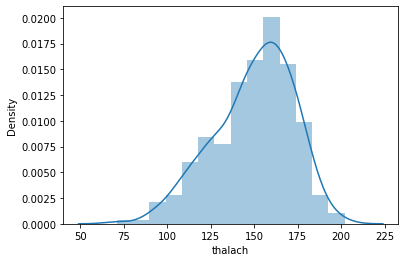

In [16]:
sns.distplot(data.thalach)

<AxesSubplot:>

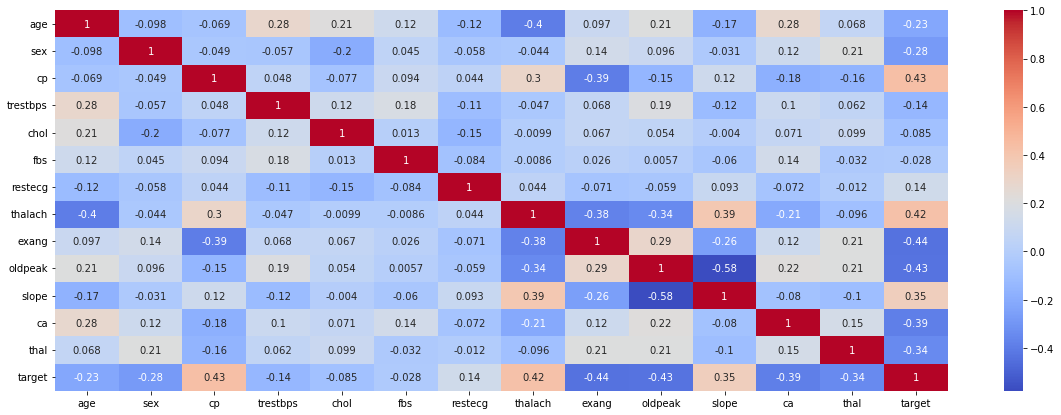

In [52]:
plt.rcParams['figure.figsize']=(20,7)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='oldpeak'>

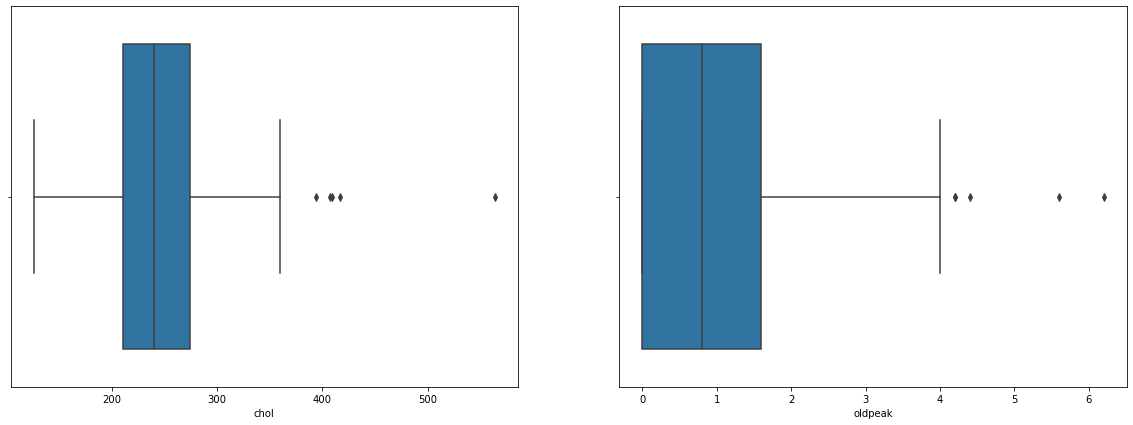

In [18]:
fig,axis=plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='chol',data=data,ax=axis[0])
sns.boxplot(x='oldpeak',data=data,ax=axis[1])

In [19]:
pd.DataFrame(data.age)

,age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


Text(0.5, 1.0, 'Count feature target by sex')

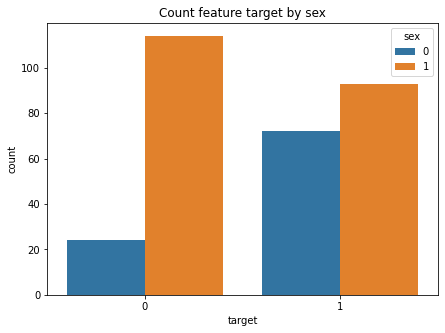

In [20]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='target',hue='sex',data=data)
plt.title('Count feature target by sex')

In [21]:
x=data.iloc[:,:-1]
y=data['target']


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30,test_size=0.7)

In [23]:
clf=tree.DecisionTreeClassifier()

In [24]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [31]:
print(y_train_pred)
print(y_test_pred)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0]
[0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1]


In [35]:
accuracy_score(y_test_pred,y_test)

0.6666666666666666

In [38]:
confusion_matrix(y_test_pred,y_test)

array([[71, 47],
       [24, 71]], dtype=int64)

In [42]:
def confusion_matrix_fun(pred,actual,label):
    cf=confusion_matrix(pred,actual)
    print(f'{label} Confusion Matrix' )
    sns.heatmap(cf,annot=True,fmt='G')
    plt.show()

test Confusion Matrix


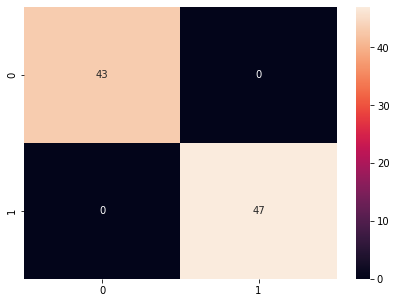

In [43]:
confusion_matrix_fun(y_train,y_train_pred,'test')

Test Confusion Matrix


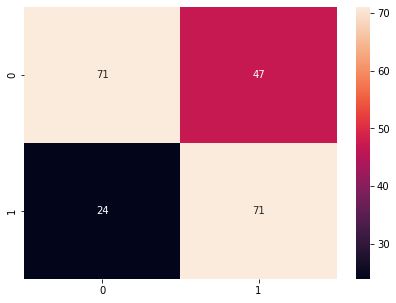

In [44]:
confusion_matrix_fun(y_test_pred,y_test,'Test')

In [46]:
c_parameter_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
c_parameter_name='Max_Depth'
df1=pd.DataFrame(columns=['Max_Depth', 'Accuracy'])
df1

,Max_Depth,Accuracy


In [50]:
for input_parameter in c_parameter_values:
    model=tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    df1=df1.append({'Max_Depth':input_parameter, 'Accuracy':acc*100},ignore_index=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11672\1182842886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'Max_Depth':input_parameter, 'Accuracy':acc*100},ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11672\1182842886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'Max_Depth':input_parameter, 'Accuracy':acc*100},ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11672\1182842886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'Max_Depth':input_parameter, 'Accuracy':acc*100},ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11672\1182842886.py:6: FutureWarning: The frame.append method is d

In [51]:
df1

,Max_Depth,Accuracy
0,1.0,0.732394
1,2.0,0.737089
2,3.0,0.676056
3,4.0,0.671362
4,5.0,0.680751
5,6.0,0.680751
6,7.0,0.737089
7,8.0,0.685446
8,9.0,0.690141
9,10.0,0.723005
